In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [26]:

# Load the dataset
df = pd.read_csv('salaries.csv')
df


,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [27]:
# Encoding categorical variables
encoder = LabelEncoder()
df['company_e']=encoder.fit_transform(df['company'])
df['job_e']=encoder.fit_transform(df['job'])
df['degree_e']=encoder.fit_transform(df['degree'])


In [34]:
# Splitting the data into features and target variable
X = df.drop(columns=['company', 'job', 'degree','salary_more_then_100k'] ,axis = 1)
y = df['salary_more_then_100k']
print(X)
print("this is my y /n", y)

    company_e  job_e  degree_e
0           2      2         0
1           2      2         1
2           2      0         0
3           2      0         1
4           2      1         0
5           2      1         1
6           0      2         1
7           0      1         0
8           0      0         0
9           0      0         1
10          1      2         0
11          1      2         1
12          1      0         0
13          1      0         1
14          1      1         0
15          1      1         1
this is my y /n 0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64


In [61]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
# Training the decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [68]:
# Making predictions
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 1], dtype=int64)

In [69]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8
Confusion Matrix:
 [[2 0]
 [1 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [70]:
y_pred2=clf.predict(X_train)
acc2=accuracy_score(y_train,y_pred2)
acc2

1.0

[Text(0.4444444444444444, 0.875, 'company_e <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]\nclass = 1'),
 Text(0.2222222222222222, 0.625, 'degree_e <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = 0'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 0'),
 Text(0.3333333333333333, 0.375, 'job_e <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.2222222222222222, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.4444444444444444, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.6666666666666666, 0.625, 'company_e <= 1.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]\nclass = 1'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = 1'),
 Text(0.7777777777777778, 0.375, 'job_e <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = 1'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(0.8888888888888888, 0.12

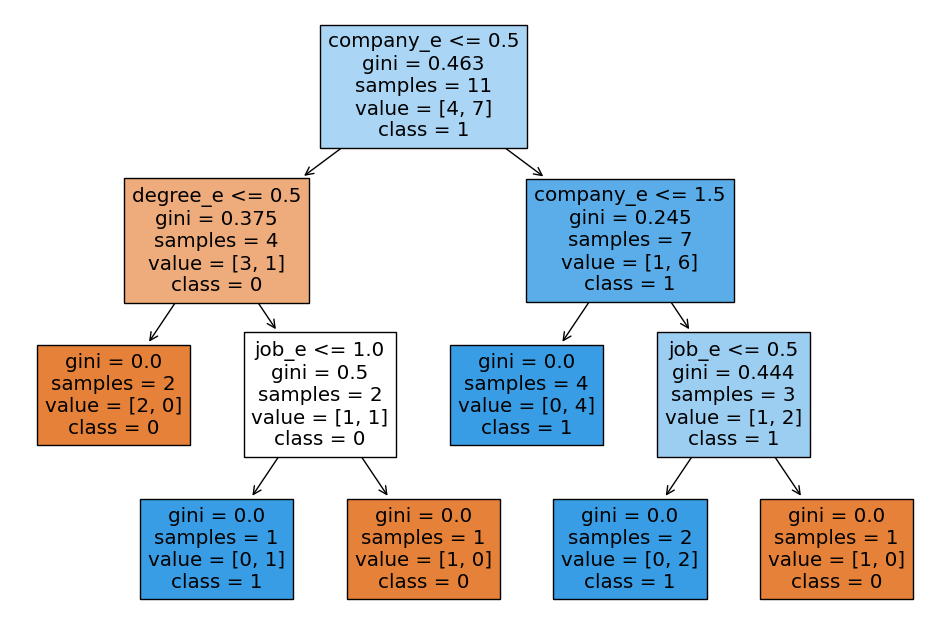

In [71]:
# Visualizing the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['0', '1'], filled=True)